In [1]:
import pandas as pd
dataframe = pd.read_csv("Frequency_Table.csv").astype("float")
dataframe

FileNotFoundError: ignored

In [ ]:
import numpy as np


if "LCB" in dataframe.columns:

    lower_class_boundaries = dataframe["LCB"].to_list()
    upper_class_boundaries = dataframe["UCB"].to_list()

    class_midpoints = []
    for i in np.arange(0, len(lower_class_boundaries)):
        class_midpoints.append( (lower_class_boundaries[i] + upper_class_boundaries[i]) / 2.0 )

    frequencies = dataframe["F"].to_list()

    cumulative_frequencies = []
    cumulative_frequency = 0
    for i in np.arange(0, len(lower_class_boundaries)):
        cumulative_frequency += frequencies[i]
        cumulative_frequencies.append(cumulative_frequency)

    number_of_data = cumulative_frequency

    relative_frequencies = []
    for i in np.arange(0, len(lower_class_boundaries)):
        relative_frequencies.append(float(frequencies[i]) / float(number_of_data))

    cumulative_relative_frequencies = []
    cumulative_relative_frequency = 0
    for i in np.arange(0, len(lower_class_boundaries)):
        cumulative_relative_frequency += relative_frequencies[i]
        cumulative_relative_frequencies.append(cumulative_relative_frequency)

    frequency_table = \
        pd.DataFrame( \
            list(zip( \
                lower_class_boundaries, \
                upper_class_boundaries, \
                class_midpoints, \
                frequencies, \
                cumulative_frequencies, \
                relative_frequencies, \
                cumulative_relative_frequencies
            )), \
            columns=[ \
                "LCB", \
                "UCB", \
                "CM", \
                "F", \
                "CF", \
                "RF", \
                "CRF"
            ]
        )
    
if "CM" in dataframe.columns:
    
    class_midpoints = dataframe["CM"].to_list()

    frequencies = dataframe["F"].to_list()

    cumulative_frequencies = []
    cumulative_frequency = 0
    for i in np.arange(0, len(class_midpoints)):
        cumulative_frequency += frequencies[i]
        cumulative_frequencies.append(cumulative_frequency)

    number_of_data = cumulative_frequency

    relative_frequencies = []
    for i in np.arange(0, len(class_midpoints)):
        relative_frequencies.append(float(frequencies[i]) / float(number_of_data))

    cumulative_relative_frequencies = []
    cumulative_relative_frequency = 0
    for i in np.arange(0, len(class_midpoints)):
        cumulative_relative_frequency += relative_frequencies[i]
        cumulative_relative_frequencies.append(cumulative_relative_frequency)

    frequency_table = \
        pd.DataFrame( \
            list(zip( \
                class_midpoints, \
                frequencies, \
                cumulative_frequencies, \
                relative_frequencies, \
                cumulative_relative_frequencies
            )), \
            columns=[ \
                "CM", \
                "F", \
                "CF", \
                "RF", \
                "CRF"
            ]
        )
    
    
frequency_table

,CM,F,CF,RF,CRF
0,3.0,0.05,0.05,0.05,0.05
1,4.0,0.35,0.40,0.35,0.40
2,5.0,0.30,0.70,0.30,0.70
3,6.0,0.20,0.90,0.20,0.90
4,7.0,0.10,1.00,0.10,1.00


In [ ]:
import numpy as np


# Find value of percentile
percentile = 60
for i in np.arange(0, len(class_midpoints)):
    if (float(percentile)/100.0 < np.round(cumulative_relative_frequencies[i], 2)):
        value_of_percentile = class_midpoints[i]
        break
    elif (float(percentile)/100.0 == np.round(cumulative_relative_frequencies[i], 2)):
        value_of_percentile = upper_class_boundaries[i]
        break
print(f"Value of percentile {percentile}: " + str(value_of_percentile))

Value of percentile 60: 5.0


In [ ]:
mean = 0
for i in np.arange(0, len(frequency_table.index)):
    mean += frequency_table.at[i, "CM"] * frequency_table.at[i, "F"]
mean /= number_of_data

if "LCB" in dataframe.columns:

    percentile = 25
    for i in np.arange(0, len(class_midpoints)):
        if (float(percentile)/100.0 < np.round(cumulative_relative_frequencies[i], 2)):
            q1 = class_midpoints[i]
            break
        elif (float(percentile)/100.0 == np.round(cumulative_relative_frequencies[i], 2)):
            q1 = upper_class_boundaries[i]
            break

    percentile = 50
    for i in np.arange(0, len(class_midpoints)):
        if (float(percentile)/100.0 < np.round(cumulative_relative_frequencies[i], 2)):
            median = class_midpoints[i]
            break
        elif (float(percentile)/100.0 == np.round(cumulative_relative_frequencies[i], 2)):
            median = upper_class_boundaries[i]
            break

    percentile = 75
    for i in np.arange(0, len(class_midpoints)):
        if (float(percentile)/100.0 < np.round(cumulative_relative_frequencies[i], 2)):
            q3 = class_midpoints[i]
            break
        elif (float(percentile)/100.0 == np.round(cumulative_relative_frequencies[i], 2)):
            q3 = upper_class_boundaries[i]
            break

    percentile = 80
    for i in np.arange(0, len(class_midpoints)):
        if (float(percentile)/100.0 < np.round(cumulative_relative_frequencies[i], 2)):
            value_of_percentile = class_midpoints[i]
            break
        elif (float(percentile)/100.0 == np.round(cumulative_relative_frequencies[i], 2)):
            value_of_percentile = upper_class_boundaries[i]
            break
        
sum_of_products_of_squares_of_deviations_and_frequencies = 0
for i in np.arange(0, len(frequency_table.index)):
    sum_of_products_of_squares_of_deviations_and_frequencies += \
        (frequency_table.at[i, "CM"] - mean)**2 * frequency_table.at[i, "F"]
sample_standard_deviation = \
    np.sqrt( sum_of_products_of_squares_of_deviations_and_frequencies / (number_of_data-1) )
population_standard_deviation = \
    np.sqrt( sum_of_products_of_squares_of_deviations_and_frequencies / number_of_data )    
    
class_midpoints_and_frequencies = pd.Series(frequency_table["F"].to_list(), index=frequency_table["CM"].to_list())
modes_and_counts = class_midpoints_and_frequencies[class_midpoints_and_frequencies == class_midpoints_and_frequencies.max()]
    
print("Mean: " + str(mean))
if "LCB" in dataframe.columns:
    print("Q1: " + str(q1))
    print("Median: " + str(median))
    print("Q3: " + str(q3))
    print(f"Value of percentile {percentile}: " + str(value_of_percentile))
print("Sample standard deviation: " + str(sample_standard_deviation))
print("Population standard deviation: " + str(population_standard_deviation))
print("Mode(s) and count(s):\n" + str(modes_and_counts))

Mean: 4.950000000000001
Sample standard deviation: nan
Population standard deviation: 1.0712142642814275
Mode(s) and count(s):
4.0    0.35
dtype: float64


<ipython-input-4-60e073f58838>:49: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt( sum_of_products_of_squares_of_deviations_and_frequencies / (number_of_data-1) )


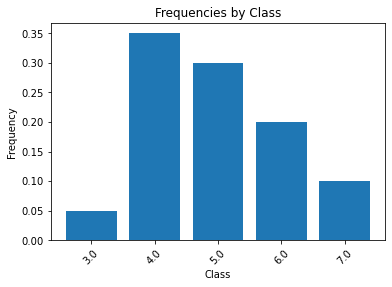

In [ ]:
import matplotlib.pyplot as plt


x_coordinates = []
for i in np.arange(0, len(class_midpoints)):
    
    if "LCB" in dataframe.columns:    
        x_coordinates.append(
            str("{:.2f}".format(lower_class_boundaries[i])) + \
            " - " + \
            str("{:.2f}".format(upper_class_boundaries[i]))
        )
    elif "CM" in dataframe.columns:
        x_coordinates.append(str(class_midpoints[i]))
        
plt.bar(x_coordinates, frequencies)
plt.title("Frequencies by Class")
plt.ylabel("Frequency")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.show()

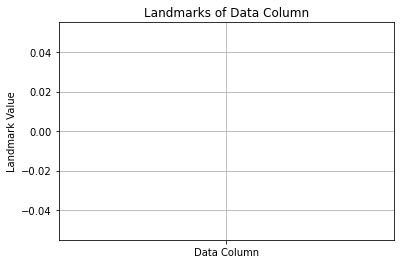

In [ ]:
column = []
for i in range(0, len(frequency_table.index)):
    for j in range(0, int(frequency_table.at[i, "F"])):
        column.append(frequency_table.at[i, "CM"])
plt.boxplot(column, labels=["Data Column"])
plt.title("Landmarks of Data Column")
plt.ylabel("Landmark Value")
plt.grid()
plt.show()